In [1]:
# Import dependencies
# numpy for matrix algbera
import numpy as np
# Pandas for data manipulation
import pandas as pd
# matplotlib for data visualization
import matplotlib.pyplot as plt

In [24]:
# Importing csv dataset with pandas
data = pd.read_csv('temps.csv')

# Extrating year and month from data
data['year'] = pd.DatetimeIndex(pd.to_datetime(data['dt'])).year
data['month'] = pd.DatetimeIndex(pd.to_datetime(data['dt'])).month

# Using only temp data for Los Angeles in October
data = data.loc[data['City'] == 'Los Angeles']
data = data.loc[data['month'] == 10]

# Looking at the first 5 rows of dataset
data.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,year,month
131855,1849-10-01,16.549,2.177,Los Angeles,United States,34.56N,118.70W,1849,10
131867,1850-10-01,17.577,1.318,Los Angeles,United States,34.56N,118.70W,1850,10
131879,1851-10-01,16.963,2.856,Los Angeles,United States,34.56N,118.70W,1851,10
131891,1852-10-01,15.792,1.630,Los Angeles,United States,34.56N,118.70W,1852,10
131903,1853-10-01,17.851,3.069,Los Angeles,United States,34.56N,118.70W,1853,10


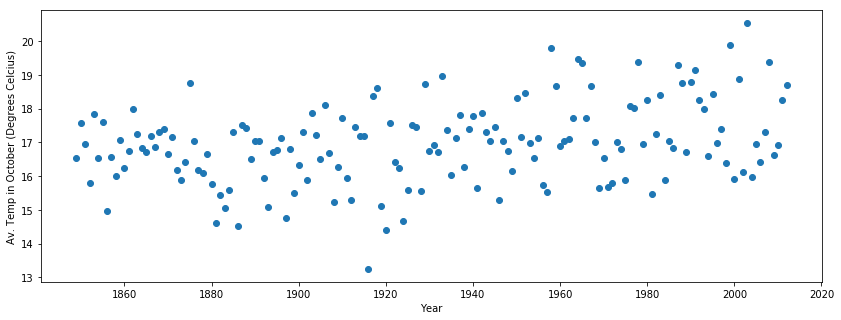

In [25]:
# Using Year as X_values and price as Y_values, we want to predict the temperature
# in LA in a future year
points = data.as_matrix(['year', 'AverageTemperature'])

# Looking at the plot of the points, we can see a linear trend 
f, ax = plt.subplots(figsize=(14, 5))
ax.set_xlabel('Year')
ax.set_ylabel('Av. Temp in October (Degrees Celcius)')
plt.scatter(points[:,0], points[:,1])
plt.show()

In [26]:
# Computes mean sum of squared error for all data points
def compute_error_for_line_given_points(b, m, points):
    totalError = 0
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        totalError += (y - (m * x + b)) ** 2
    return totalError / float(len(points))

In [27]:
def step_gradient(b_current, m_current, points, learningRate, lam, regularizer):
    b_gradient = 0
    m_gradient = 0
    N = float(len(points))
    
    # Iterating over all points
    for i in range(0, len(points)):
        # Getting x and y values
        x = points[i, 0]
        y = points[i, 1]
        
        # Calculating gradients according to regularization
        if regularizer == 'L1':
            m_gradient += (lam/(2*N) -(x/N) * (y - ((m_current * x) + b_current)))
        elif regularizer == 'L2':
            m_gradient += (lam/N*m_current - (x/N) * (y - ((m_current * x) + b_current)))
        else:
            m_gradient += -(x/N) * (y - ((m_current * x) + b_current))
        b_gradient += -(1/N) * (y - ((m_current * x) + b_current))
        
    # Updating b and m with learningrate * gradients
    new_b = b_current - (learningRate * b_gradient)
    new_m = m_current - (learningRate * m_gradient)
    return [new_b, new_m]

In [28]:
def gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_iterations, lam, regularizer):
    b = starting_b
    m = starting_m
    for i in range(num_iterations):
        b, m = step_gradient(b, m, np.array(points), learning_rate, lam, regularizer)
        # Every 100 iterations, prints b and m and error
        if i % 100 == 0:
            print('Iteration {}, b:{}, m:{}, error:{}'.format(i, b, m, compute_error_for_line_given_points(b, m, points)))
    return [b, m]

def run(lr, num_iter, lam, regularizer=None):
    learning_rate = lr
    initial_b = 0 # initial y-intercept guess
    initial_m = 0 # initial slope guess
    num_iterations = num_iter
    print("Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b, initial_m, compute_error_for_line_given_points(initial_b, initial_m, points)))
    print("Running...")
    [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations, lam, regularizer)
    print("After {0} iterations b = {1}, m = {2}, error = {3}".format(num_iterations, b, m, compute_error_for_line_given_points(b, m, points)))
    return b, m

# Predicts y, given x
def predict(b, m, x_values):
    predicted_y = list()
    for x in x_values:
        y = m * x + b
        predicted_y.append(y)
    return predicted_y

In [29]:
# Hyperparameters
learning_rate = 0.0000001
iterations = 500
lamb = 500

# Linear Regression with L1 
b1, m1 = run(learning_rate, iterations, lamb, 'L1')

# Linear Regression with L2 
b2, m2 = run(learning_rate, iterations, lamb, 'L2')

# Linear Regression without Regularization
b3, m3 = run(learning_rate, iterations, lamb)

Starting gradient descent at b = 0, m = 0, error = 289.596072
Running...
Iteration 0, b:1.69748902439e-06, m:0.00325385360671, error:115.699623549
Iteration 100, b:5.8305911962e-06, m:0.0087256371669, error:1.31369460864
Iteration 200, b:7.13100981839e-06, m:0.00872563649369, error:1.31369460703
Iteration 300, b:8.43142843276e-06, m:0.00872563582048, error:1.31369460542
Iteration 400, b:9.73184703931e-06, m:0.00872563514726, error:1.31369460381
After 500 iterations b = 1.10192614521e-05, m = 0.00872563448078, error = 1.31369460221
Starting gradient descent at b = 0, m = 0, error = 289.596072
Running...
Iteration 0, b:1.69748902439e-06, m:0.00327885360671, error:114.669220217
Iteration 100, b:4.57989611561e-06, m:0.00879149983506, error:1.29693959658
Iteration 200, b:4.60884843979e-06, m:0.00879149982007, error:1.29693959654
Iteration 300, b:4.63780076377e-06, m:0.00879149980508, error:1.29693959651
Iteration 400, b:4.66675308753e-06, m:0.0087914997901, error:1.29693959647
After 500 ite

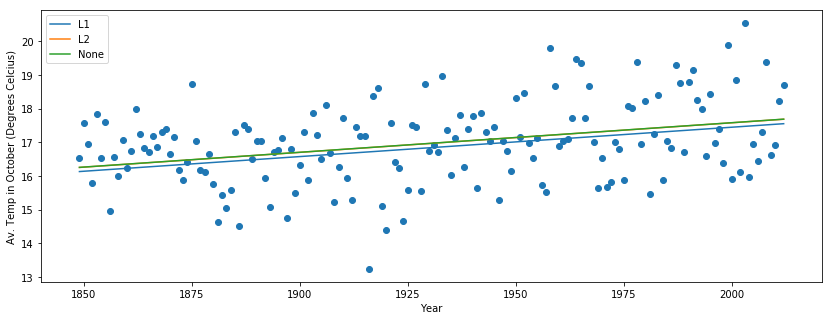

In [30]:
# Comparing best-fit line with dataset
f, ax = plt.subplots(figsize=(14, 5))
ax.set_xlabel('Year')
ax.set_ylabel('Av. Temp in October (Degrees Celcius)')
plt.plot(points[:,0], predict(b1, m1, points[:,0]), label='L1')
plt.plot(points[:,0], predict(b2, m2, points[:,0]), label='L2')
plt.plot(points[:,0], predict(b3, m3, points[:,0]), label='None')
plt.scatter(points[:,0], points[:,1])
plt.legend()
plt.show()

In [31]:
# And just for fun, let's predict the impact of global warming by 2100
temp = predict(b1,m1, [2017, 2050, 2100])

temp

[17.599615767003478, 17.887561704869363, 18.323843428908578]